In [5]:
import cv2
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import os


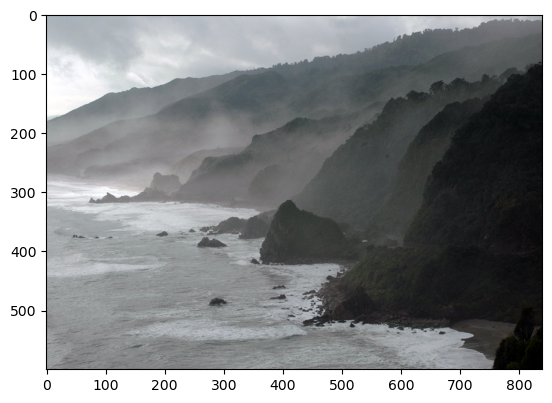

In [6]:
coast = cv2.imread('images/New_Zealand_Coast.jpg')
coast = cv2.cvtColor(coast, cv2.COLOR_BGR2RGB)
plt.imshow(coast, cmap='gray')
plt.show()
#Image('images/New_Zealand_Coast.jpg')

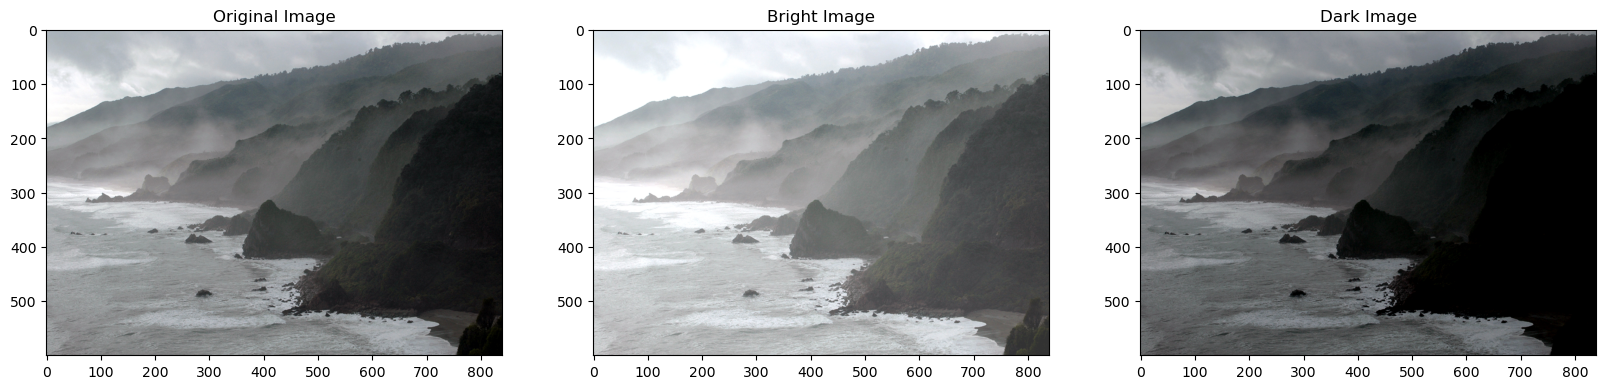

In [7]:
bm = np.ones(coast.shape, dtype='uint8') * 50
bright = cv2.add(coast, bm)
dark = cv2.subtract(coast, bm)
plt.figure(figsize=(20, 20))
plt.subplot(131); plt.imshow(coast, cmap='gray'); plt.title('Original Image')
plt.subplot(132); plt.imshow(bright, cmap='gray'); plt.title('Bright Image')
plt.subplot(133); plt.imshow(dark, cmap='gray'); plt.title('Dark Image')
plt.show() 

Text(0.5, 1.0, 'Brighter Image')

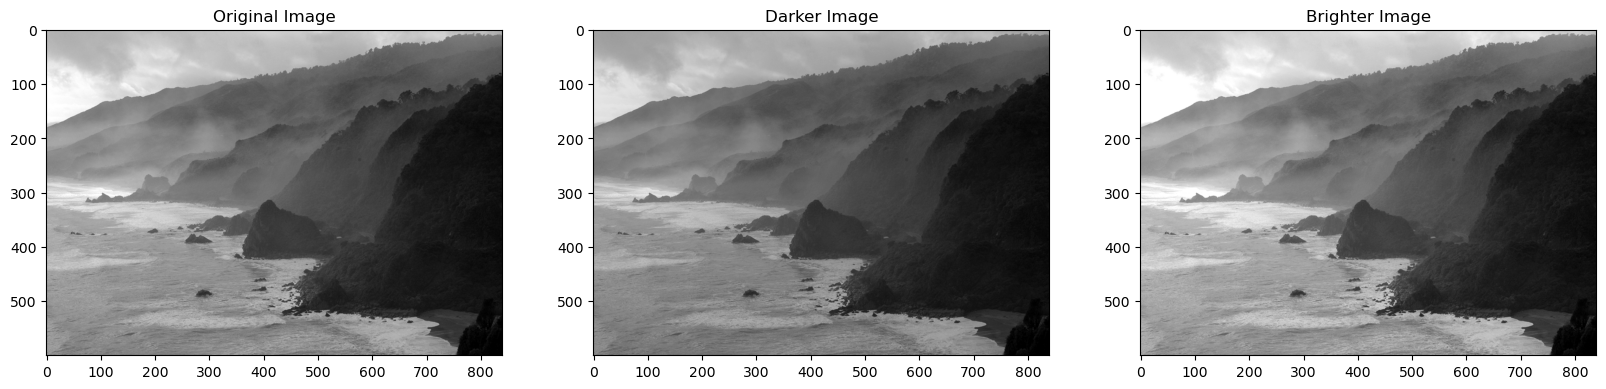

In [10]:
coast = cv2.imread('images/New_Zealand_Coast.jpg', cv2.IMREAD_GRAYSCALE)
coast = cv2.cvtColor(coast, cv2.COLOR_BGR2RGB)

m1 = np.ones(coast.shape) * 0.9
m2 = np.ones(coast.shape) * 1.1

darker = np.uint8(np.multiply(np.float64(coast), m1))
brighter = np.uint8(np.clip(np.multiply(np.float64(coast), m2), 0, 255))

plt.figure(figsize=(20, 20))
plt.subplot(131); plt.imshow(coast, cmap='gray'); plt.title('Original Image')
plt.subplot(132); plt.imshow(darker, cmap='gray'); plt.title('Darker Image')
plt.subplot(133); plt.imshow(brighter, cmap='gray'); plt.title('Brighter Image')


(572, 800)


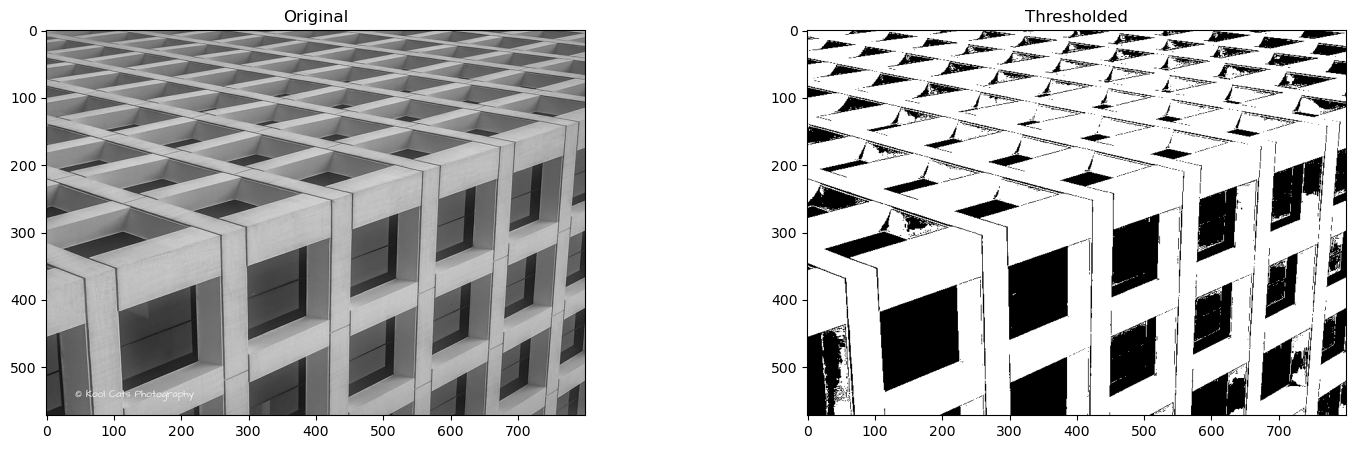

In [ ]:
#thresholding
img_read = cv2.imread("images/building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")

print(img_thresh.shape)

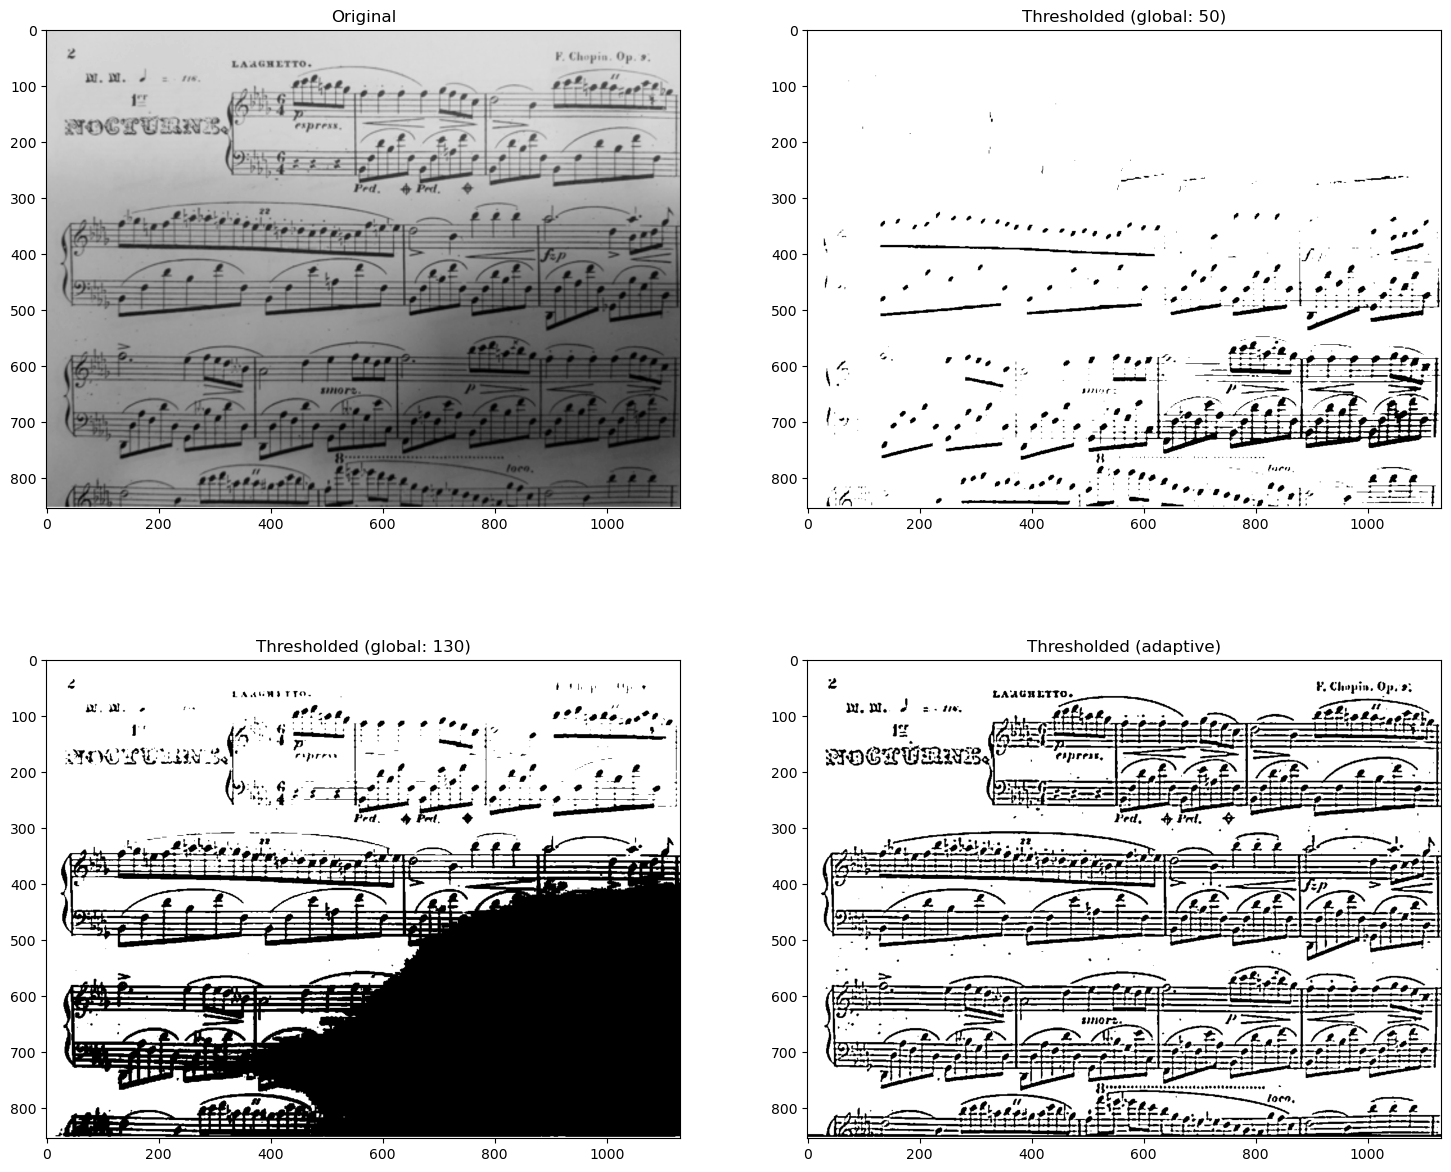

In [ ]:
#adaptive thresholding 
img_read = cv2.imread("images/Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

(200, 499)


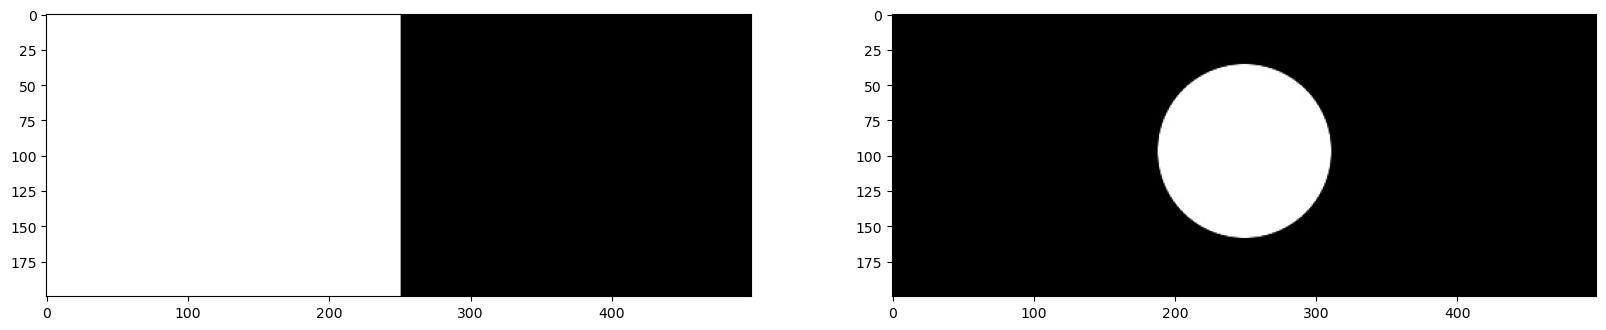

In [35]:
img_rec = cv2.imread("images/rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("images/circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)

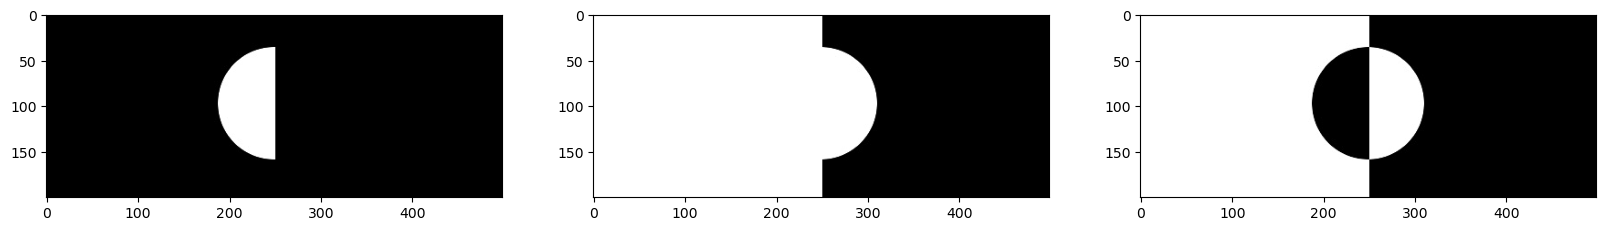

In [39]:
#bitwise
result_and = cv2.bitwise_and(img_rec, img_cir, mask=None)
result_or = cv2.bitwise_or(img_rec, img_cir, mask=None)
result_xor = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.figure(figsize=[20, 5])
plt.subplot(131);plt.imshow(result_and, cmap="gray")
plt.subplot(132);plt.imshow(result_or, cmap="gray")
plt.subplot(133);plt.imshow(result_xor, cmap="gray")


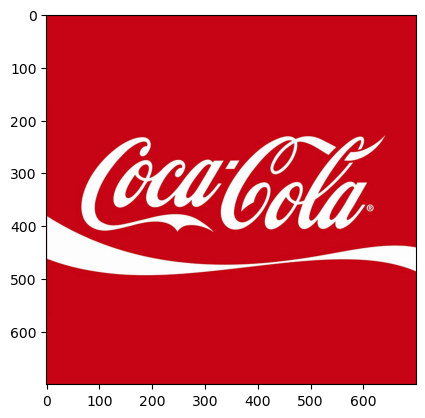

In [53]:
#image manipulation

cola = cv2.imread('images/coca-cola-logo.png')
cola = cv2.cvtColor(cola, cv2.COLOR_BGR2RGB)
plt.imshow(cola)

logow = cola.shape[1]
logoh = cola.shape[0]

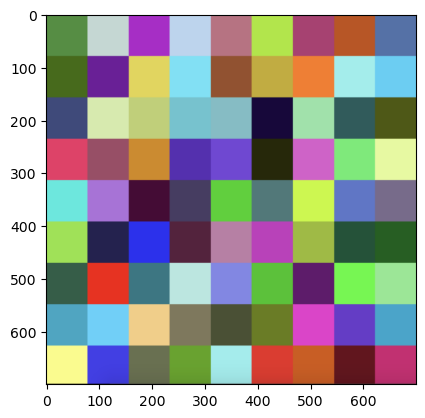

In [54]:
checkers = cv2.imread('images/checkerboard_color.png')
checkers = cv2.cvtColor(checkers, cv2.COLOR_BGR2RGB)

aspect_ratio = logow/checkers.shape[1]
dim = (logow, int(checkers.shape[0]*aspect_ratio))

resized = cv2.resize(checkers, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)

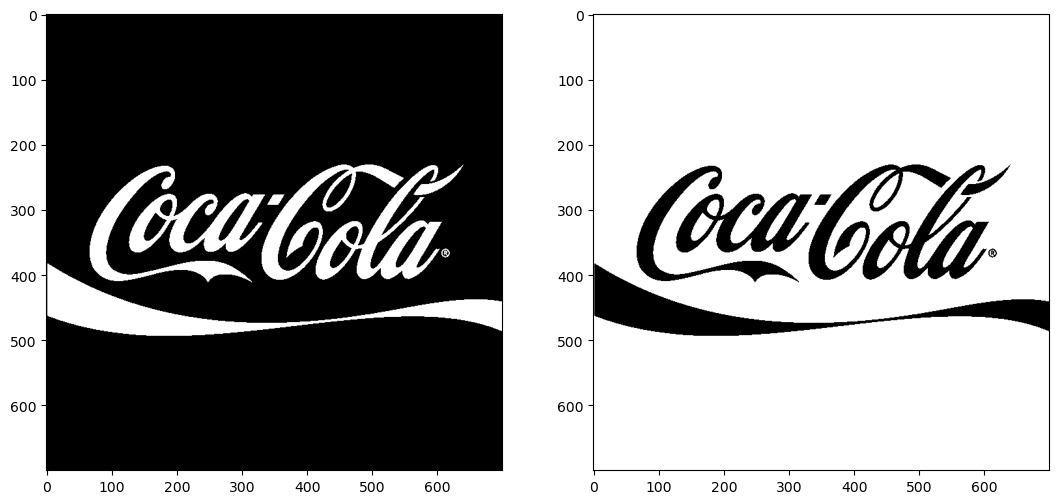

In [68]:
colagray= cv2.cvtColor(cola, cv2.COLOR_RGB2GRAY)

retval, colamask = cv2.threshold(colagray, 127, 255, cv2.THRESH_BINARY)
colainv = cv2.bitwise_not(colamask)
plt.figure(figsize=[20, 20])
plt.subplot(131); plt.imshow(colamask, cmap='gray')
plt.subplot(132); plt.imshow(colainv, cmap='gray')

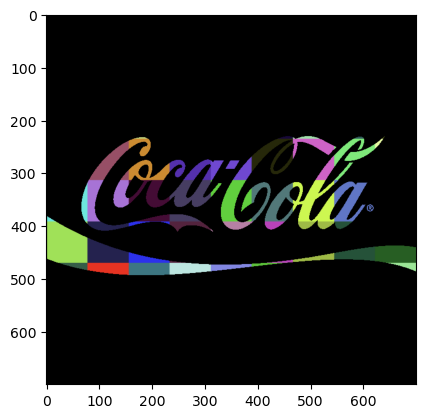

In [66]:
background = cv2.bitwise_and(resized, resized, mask=colamask)
plt.imshow(background)

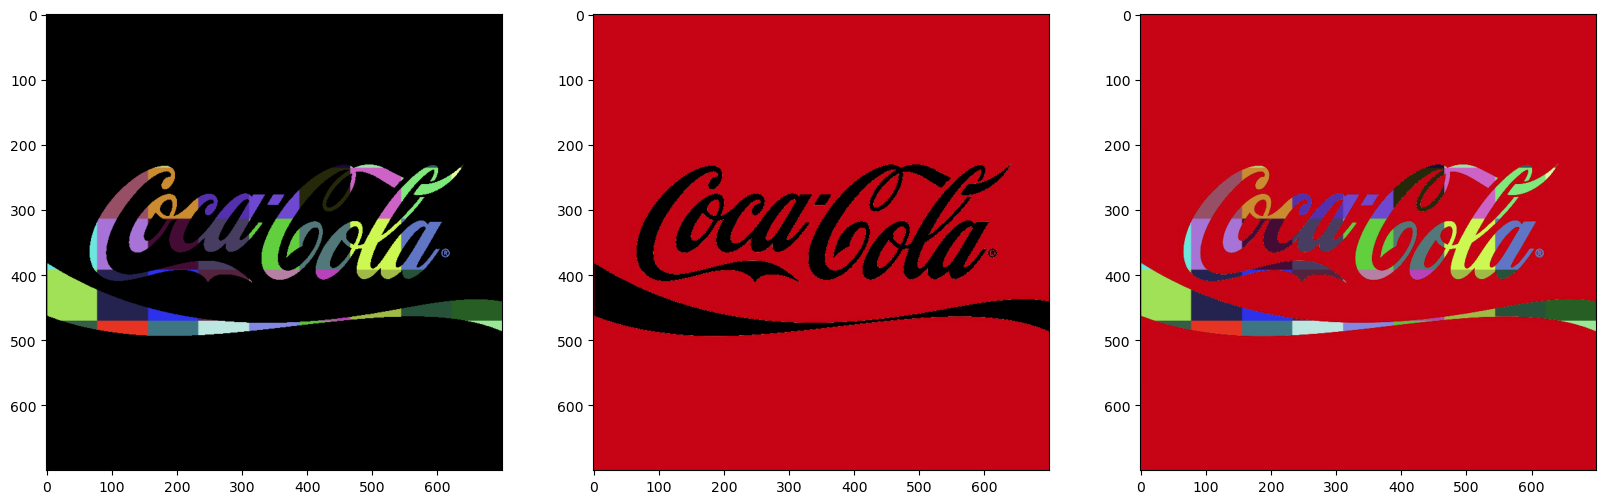

In [73]:
cocacola = cv2.bitwise_and(cola, cola, mask=colainv)
result = cv2.add(background, cocacola)
plt.figure(figsize=[20, 20])
plt.subplot(131); plt.imshow(background)
plt.subplot(132); plt.imshow(cocacola)
plt.subplot(133);plt.imshow(result)
plt.imshow(result)